In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 一、数据探索分析

In [2]:
# 读取输出
train = pd.read_csv('F:/Jupyter_Program/Algorithm/DCIC/train_dataset.csv')
test = pd.read_csv('F:/Jupyter_Program/Algorithm/DCIC/test_dataset.csv')

In [3]:
# 观察一下数据
train.info()
"""50000条样本，信用分作为要预测的label，是连续型的数值，回归任务。
    除了用户编号和信用分外，有28维特征，都是数值型的，且没有缺失数据。
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
用户编码               50000 non-null object
用户实名制是否通过核实        50000 non-null int64
用户年龄               50000 non-null int64
是否大学生客户            50000 non-null int64
是否黑名单客户            50000 non-null int64
是否4G不健康客户          50000 non-null int64
用户网龄（月）            50000 non-null int64
用户最近一次缴费距今时长（月）    50000 non-null int64
缴费用户最近一次缴费金额（元）    50000 non-null float64
用户近6个月平均消费值（元）     50000 non-null float64
用户账单当月总费用（元）       50000 non-null float64
用户当月账户余额（元）        50000 non-null int64
缴费用户当前是否欠费缴费       50000 non-null int64
用户话费敏感度            50000 non-null int64
当月通话交往圈人数          50000 non-null int64
是否经常逛商场的人          50000 non-null int64
近三个月月均商场出现次数       50000 non-null int64
当月是否逛过福州仓山万达       50000 non-null int64
当月是否到过福州山姆会员店      50000 non-null int64
当月是否看电影            50000 non-null int64
当月是否景点游览           50000 non-null int64
当月是否体育场馆消费         50000 non-null int64
当月网购

'50000条样本，信用分作为要预测的label，是连续型的数值，回归任务。\n    除了用户编号和信用分外，有28维特征，都是数值型的，且没有缺失数据。\n'

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Credit score')

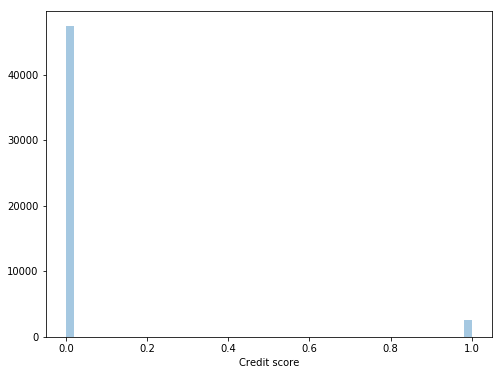

In [4]:
# 看一下 label 数据的分布
plt.figure(figsize=(8,6))

sns.distplot(train['缴费用户当前是否欠费缴费'].values,bins=50,kde=False)
plt.xlabel('Credit score')

In [16]:
train.head()

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,...,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,...,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,...,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,...,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,...,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,...,1,0,522,0,64,59,0,0,0,648


In [28]:
flag1 = train['缴费用户最近一次缴费金额（元）']%10==0 
flag2 = train['缴费用户最近一次缴费金额（元）']!=0
np.count_nonzero(flag1* flag2)


F:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


1242

In [29]:
print(train.describe())

       用户实名制是否通过核实          用户年龄       是否大学生客户       是否黑名单客户     是否4G不健康客户  \
count  50000.00000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.99022     37.883440      0.003720      0.048800      0.088580   
std        0.09841     11.613239      0.060879      0.215452      0.284139   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        1.00000     30.000000      0.000000      0.000000      0.000000   
50%        1.00000     36.000000      0.000000      0.000000      0.000000   
75%        1.00000     45.000000      0.000000      0.000000      0.000000   
max        1.00000    111.000000      1.000000      1.000000      1.000000   

            用户网龄（月）  用户最近一次缴费距今时长（月）  缴费用户最近一次缴费金额（元）  用户近6个月平均消费值（元）  \
count  50000.000000     50000.000000     50000.000000    50000.000000   
mean      96.448680         0.700100        53.415929       98.732081   
std       59.176593         0.458218        61.812022       60.757758   
min  

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


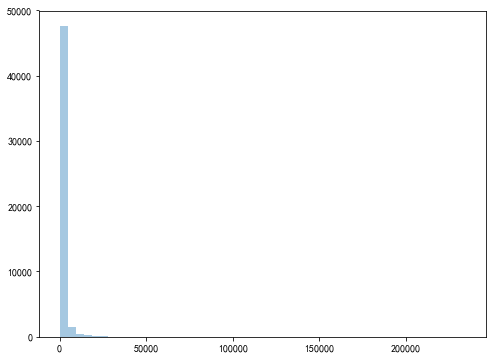

In [30]:
plt.figure(figsize=(8,6))
col =     '当月网购类应用使用次数'
sns.distplot(train[col].values,bins=50,kde=False)

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


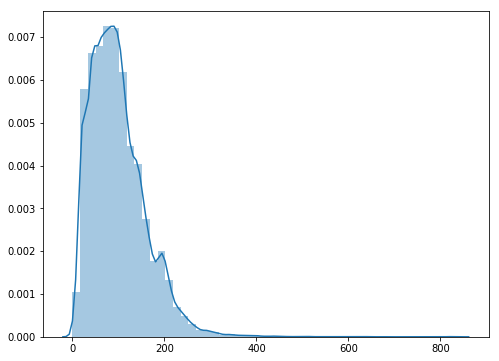

In [7]:
plt.figure(figsize=(8,6))
sns.distplot(train['用户近6个月平均消费值（元）'].values,bins=50)

In [8]:
(train['用户年龄']==0).value_counts()

False    49710
True       290
Name: 用户年龄, dtype: int64

In [9]:
train.columns

Index(['用户编码', '用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户',
       '用户网龄（月）', '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）',
       '用户账单当月总费用（元）', '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数',
       '是否经常逛商场的人', '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影',
       '当月是否景点游览', '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数',
       '当月金融理财类应用使用总次数', '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数',
       '当月旅游资讯类应用使用次数', '信用分'],
      dtype='object')

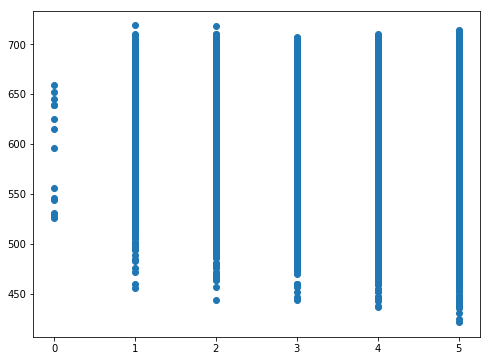

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(train['用户话费敏感度'],train['信用分'])

In [11]:
# 看一下特征和目标变量的相关关系
features = [x for x in train.columns if x not in ['用户编码','信用分']]
values =[]
for feature in features:
    values.append(np.corrcoef(train[feature],train['信用分'])[0,1])
corr_df = pd.DataFrame({'feature': features,'corr_value': values})
corr_df.sort_values(by='corr_value')


,feature,corr_value
12,用户话费敏感度,-0.239400
4,是否4G不健康客户,-0.147162
22,当月物流快递类应用使用次数,0.001054
25,当月飞机类应用使用次数,0.014362
27,当月旅游资讯类应用使用次数,0.020780
2,是否大学生客户,0.025312
0,用户实名制是否通过核实,0.028927
26,当月火车类应用使用次数,0.032554
21,当月网购类应用使用次数,0.033495
1,用户年龄,0.037780


In [12]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

<BarContainer object of 28 artists>

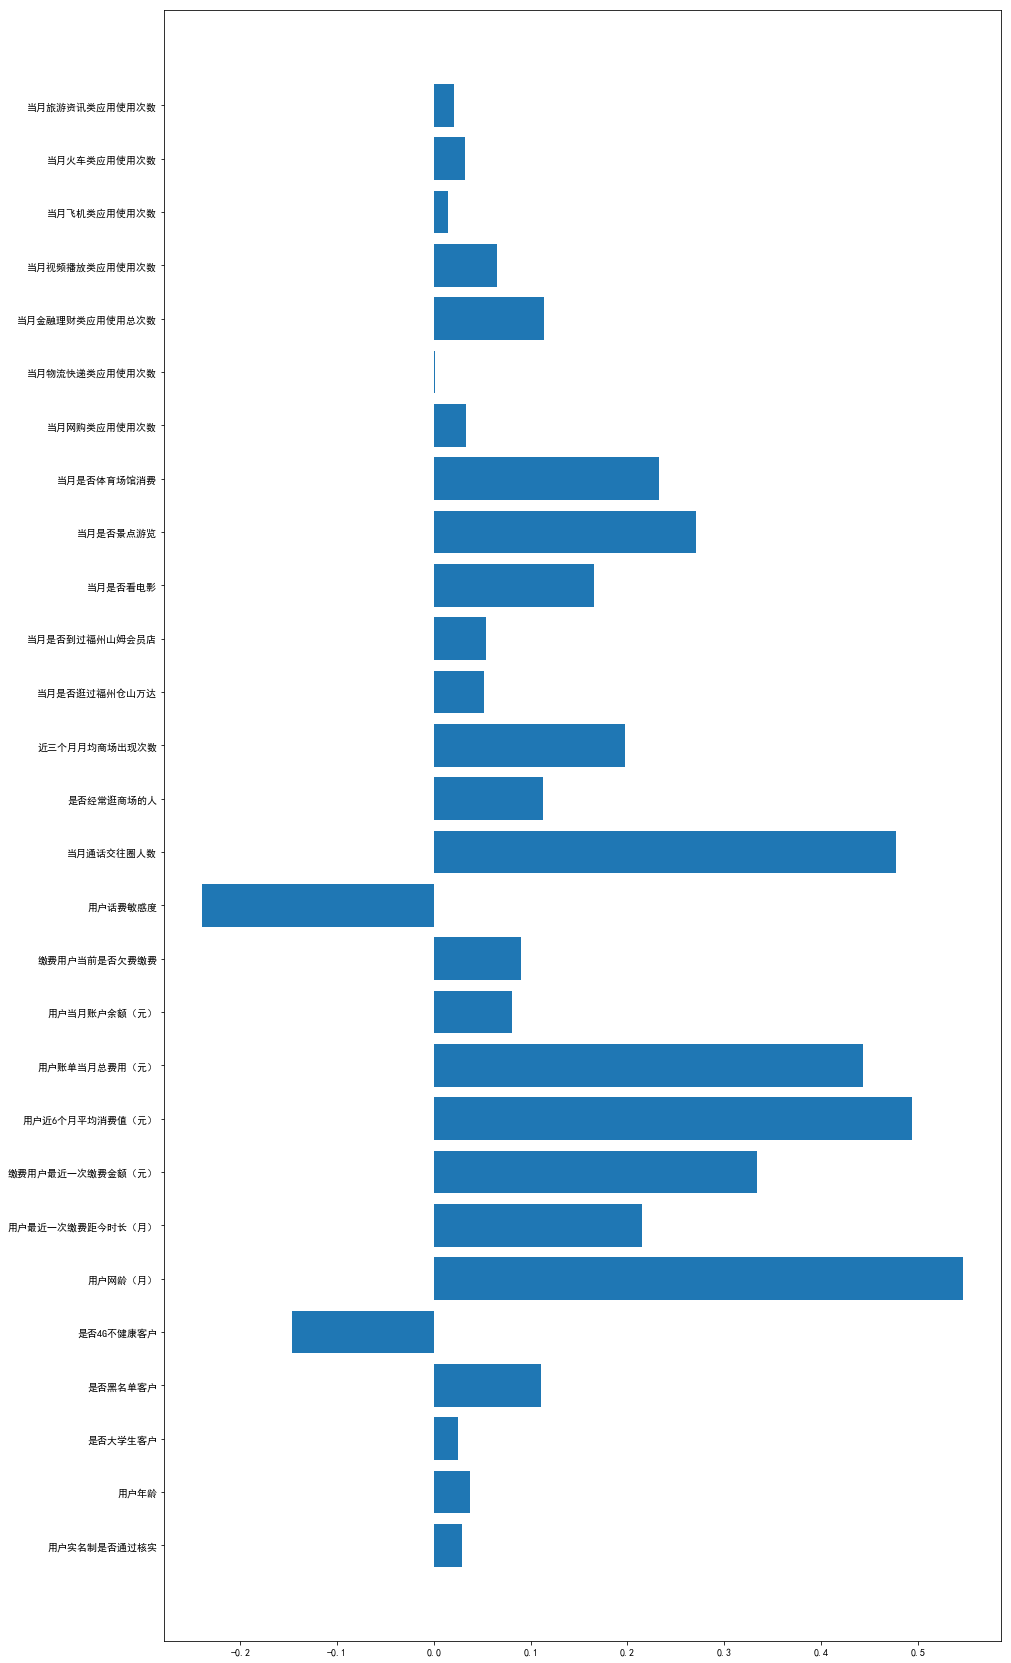

In [13]:
plt.figure(figsize=(15,30))
plt.barh(corr_df['feature'],corr_df['corr_value'],height=0.8)

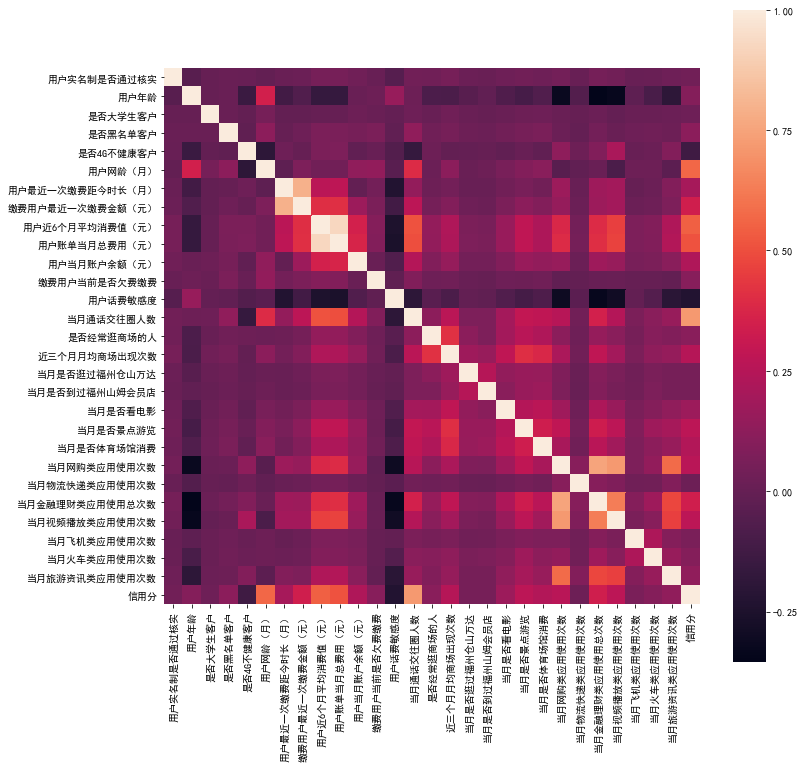

In [14]:
# 画热力图看一下所有变量之间的两两相关关系
corrmat = train.corr(method='spearman')
plt.subplots(figsize=(12,12))

sns.heatmap(corrmat,vmax=1.,square=True)